In [180]:
import numpy as np
from scipy.integrate import ode

radius = 2
size = 10
gridlines = 10
resolution = 20
timeend = 10

def schwarzschild(t, x):
    return [
        x[2],
        x[3],
        radius * x[2]**2 / (2*x[0]*(x[0] - radius)) - radius * (x[0] - radius)* x[3]**2 / ( 2*x[0]**3),
        -radius * x[2] * x[3] / ( 2*x[0]*(x[0] - radius)),
    ]

x0 = [5, 0.01, 0.01, 1]

solver = ode(schwarzschild)


[[ 5.00087993e+00  1.09996939e-01  7.60096037e-03  9.99941354e-01]
 [ 5.00152009e+00  2.09988809e-01  5.20240736e-03  9.99898707e-01]
 [ 5.00192042e+00  3.09977213e-01  2.80418708e-03  9.99872047e-01]
 [ 5.00208092e+00  4.09963748e-01  4.06146234e-04  9.99861366e-01]
 [ 5.00200160e+00  5.09950008e-01 -1.99186840e-03  9.99866662e-01]
 [ 5.00168247e+00  6.09937589e-01 -4.39001008e-03  9.99887929e-01]
 [ 5.00112354e+00  7.09928087e-01 -6.78843207e-03  9.99925165e-01]
 [ 5.00032473e+00  8.09923104e-01 -9.18728796e-03  9.99978411e-01]
 [ 4.99928597e+00  9.09924242e-01 -1.15867313e-02  1.00004770e+00]
 [ 4.99800723e+00  1.00993310e+00 -1.39869155e-02  1.00013305e+00]
 [ 4.99648846e+00  1.10995128e+00 -1.63879940e-02  1.00023448e+00]
 [ 4.99472954e+00  1.20998040e+00 -1.87901216e-02  1.00035206e+00]
 [ 4.99273031e+00  1.31002210e+00 -2.11934529e-02  1.00048587e+00]
 [ 4.99049068e+00  1.41007799e+00 -2.35981424e-02  1.00063597e+00]
 [ 4.98801053e+00  1.51014969e+00 -2.60043441e-02  1.00080240e

c:\Users\adity\.conda\envs\$py310\lib\site-packages\scipy\integrate\_ode.py:1011: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


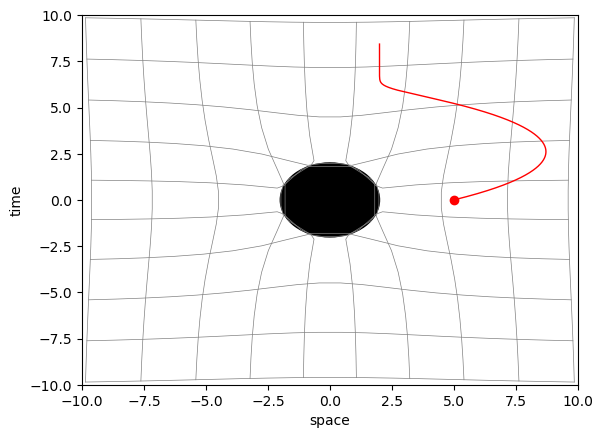

In [215]:
import matplotlib.pyplot as plt
plt.xlim(-size, size)
plt.ylim(-size, size)
plt.xlabel('space')
plt.ylabel('time')

lines = []
for x in np.linspace(-size, size, gridlines):
    line = []
    for y in np.linspace(-size, size, resolution):
        point = [np.sqrt(x*x + y*y),0.001, 0.001, 1]
        solver.set_initial_value(point, 0)
        solution = solver.integrate(timeend)
        line.append([solution[0]*np.cos(np.arctan2(y,x)), solution[0]*np.sin(np.arctan2(y,x))])
    lines.append(line)
for y in np.linspace(-size, size, gridlines):
    line = []
    for x in np.linspace(-size, size, resolution):
        point = [np.sqrt(x*x + y*y),0.001, 0.001, 1]
        solver.set_initial_value(point, 0)
        solution = solver.integrate(timeend)
        line.append([solution[0]*np.cos(np.arctan2(y,x)), solution[0]*np.sin(np.arctan2(y,x))])
    lines.append(line)

for line in lines:
    plt.plot([point[0] for point in line], [point[1] for point in line], color='grey', markersize=1, linestyle='-', linewidth=0.5)

x0 = [5, 0.01, 0.3, 1]
plt.plot(x0[0],x0[1], 'ro')
solution = []
solver.set_initial_value(x0, 0)
while solver.successful() and solver.t < 100:
    solver.integrate(solver.t + 0.1)
    solution.append(solver.y)

solution = np.array(solution)
line = [ [s[0],s[1]/10] for s in solution]
plt.plot([point[0] for point in line], [point[1] for point in line], color='red', markersize=1, linestyle='-', linewidth=1)
circle = plt.Circle((0, 0), radius, color='black')
plt.gca().add_patch(circle) 
plt.show()